In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from g_ml.utilidades.processamento import escala_padrao

from sklearn.metrics import davies_bouldin_score

np.random.seed(42)

In [2]:
X = np.genfromtxt('../data/quake.csv', delimiter=',')

In [3]:
escalador_X = escala_padrao()

escalador_X.fit(X)

X_escalado = escalador_X.transform(X)


## Kmeans

In [4]:
#centroides = D x K
#distancias = n x K
def Kmeans(K, X, n_init):
    D = X.shape[1]
    n = len(X)
    tol = 0.001
    data = np.c_[X, np.zeros(n)]

    erro_por_init = []
    centroides_por_init = []
    historico_por_init = []
    historico_C = []

    for i in range(n_init):
        #inicialização
        erros_hist = []
        centroides = np.zeros((D,K))
        for i in range(K):
            i_aleatorio=np.random.randint(0,len(X))
            centroides[:, i] = X[i_aleatorio]

        erro_anterior = 0
        dif = 999
        while dif > tol:
            #parte 1            
            euclidistancias = np.zeros((n,K))
            for k in range(K):
                distancia_k = np.sqrt(np.sum((X-centroides[:,k])**2,axis=1))
                euclidistancias[:,k]=distancia_k

            C=np.argmin(euclidistancias,axis=1)
            data[:, -1] = C

            grupos  = np.unique(data[:, -1])
            #parte 2
            erro_recon = 0
            for grupo in grupos:
                X_grupo = data[:,0:D][data[:, -1] == grupo]            
                m_grupo = np.sum(X_grupo, axis = 0)/len(X_grupo)
                centroides[:, int(grupo)] = m_grupo
                erro_recon = erro_recon + np.sum(np.power((X_grupo-centroides[:, int(grupo)]),2))

            dif = np.abs(erro_recon - erro_anterior)
            #print(dif)
            erros_hist.append(erro_recon)
            erro_anterior = erro_recon

        erro_por_init.append(np.min(erros_hist))
        historico_por_init.append(erros_hist)
        centroides_por_init.append(centroides)

        melhor_centroide = centroides_por_init[np.argmin(erro_por_init)]
        melhor_historico = historico_por_init[np.argmin(erro_por_init)]
        menor_erro = np.min(erro_por_init)

        euclidistancias = np.zeros((n,K))
        for k in range(K):
            distancia_k = np.sqrt(np.sum((X-melhor_centroide[:,k])**2,axis=1))
            euclidistancias[:,k]=distancia_k

        C=np.argmin(euclidistancias,axis=1)
        historico_C.append(C)
        melhor_C = historico_C[np.argmin(erro_por_init)]
    
    return melhor_centroide, melhor_historico, melhor_C, menor_erro
    

        
     




In [5]:
lista_erro = []
lista_db = []
melhor_DB = 999
melhor_K = 2
for k in range(2,21):
    melhor_centroide, melhor_historico, melhor_C, menor_erro = Kmeans(k, X_escalado, 200)
    lista_erro.append(menor_erro)
    DB = davies_bouldin_score(X_escalado, melhor_C)
    lista_db.append(DB)
    if DB < melhor_DB:
        melhor_DB = DB
        melhor_K = k
    print("K = {}".format(k))
    print("Erro de reconstrução = {}".format(menor_erro))
    print("Índice DB = {}".format(DB))
    print("-------------")
print("O melhor Indice DB é {} para K = {}".format(melhor_DB, melhor_K))

K = 2
Erro de reconstrução = 2295.2252253804904
Índice DB = 0.8994185058103716
-------------
K = 3
Erro de reconstrução = 1309.8195847788757
Índice DB = 0.6610886397316417
-------------
K = 4
Erro de reconstrução = 723.9398901490845
Índice DB = 0.6139971288313492
-------------
K = 5
Erro de reconstrução = 585.5476037125756
Índice DB = 0.6198877363707009
-------------
K = 6
Erro de reconstrução = 471.14582016057835
Índice DB = 0.6175404812991152
-------------
K = 7
Erro de reconstrução = 385.91093447228974
Índice DB = 0.6345871728498655
-------------
K = 8
Erro de reconstrução = 309.6093514059984
Índice DB = 0.7247760860202013
-------------
K = 9
Erro de reconstrução = 255.6807482341301
Índice DB = 0.6267810936449387
-------------
K = 10
Erro de reconstrução = 211.53067655450985
Índice DB = 0.5911315335837017
-------------
K = 11
Erro de reconstrução = 181.55676624544245
Índice DB = 0.6248783507255371
-------------
K = 12
Erro de reconstrução = 157.15069378914177
Índice DB = 0.589522305

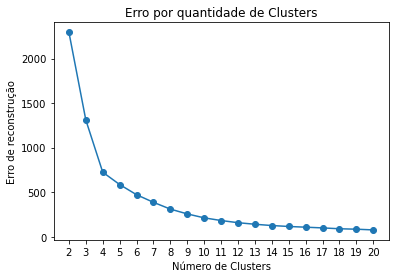

In [6]:
ticks = list(range(2,21))
plt.plot(ticks, lista_erro,'-o')
plt.xticks(ticks=ticks)
plt.ylabel("Erro de reconstrução")
plt.xlabel("Número de Clusters")
plt.title("Erro por quantidade de Clusters")
plt.show()


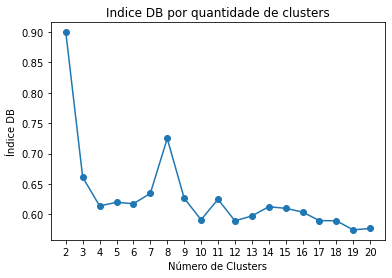

In [7]:
ticks = list(range(2,21))
plt.plot(ticks,lista_db,'-o')
plt.ylabel("Índice DB")
plt.xlabel("Número de Clusters")
plt.title("Indice DB por quantidade de clusters")
plt.xticks(ticks=ticks)
plt.show()

In [8]:
melhor_centroide, melhor_historico, melhor_C, menor_erro = Kmeans(melhor_K, X_escalado, 200)

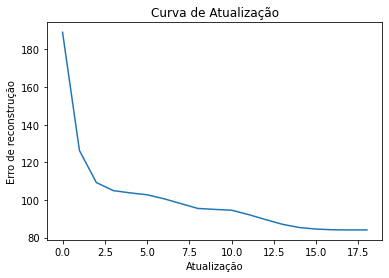

In [9]:
plt.plot(melhor_historico)
plt.ylabel("Erro de reconstrução")
plt.xlabel("Atualização")
plt.title("Curva de Atualização")
plt.show()

**Representação dos conjuntos**

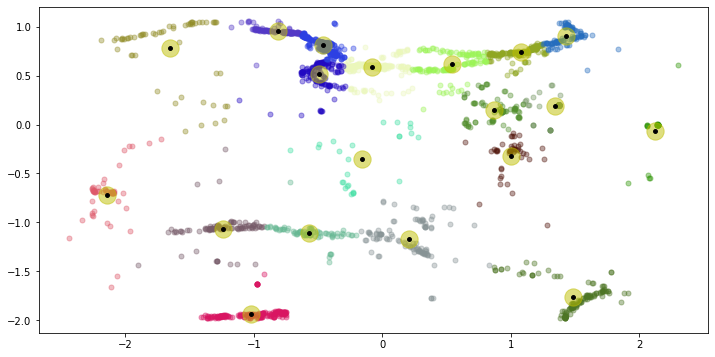

In [10]:
data = np.c_[X_escalado, melhor_C]
plt.figure(figsize=(12,6))
for k in range(melhor_K):
    c=np.random.rand(3,)
    plt.scatter(data[:,0][data[:,2]==k],data[:,1][data[:,2]==k], s=25,alpha=0.4,color=c)
    plt.scatter(melhor_centroide[0,k], melhor_centroide[1,k], s=300, color='y', alpha=0.5)
    plt.scatter(melhor_centroide[0,k], melhor_centroide[1,k], s=15, color='black')
plt.show()